In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_score,confusion_matrix

In [3]:
#Dataset fromt
#https://www.kaggle.com/volodymyrgavrysh/bank-marketing-campaigns-dataset

df = pd.read_csv("bank-additional-full.csv" , sep = ";", header = 0)

In [4]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [6]:
numerical_data = [ "age" ]
categorical_data = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week']

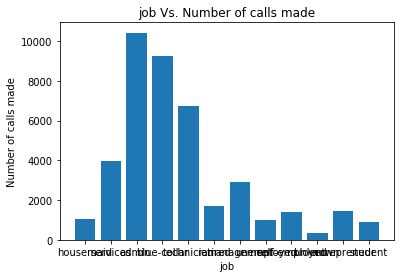

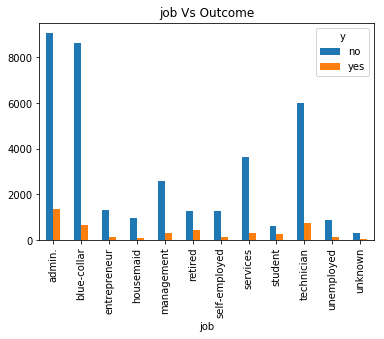

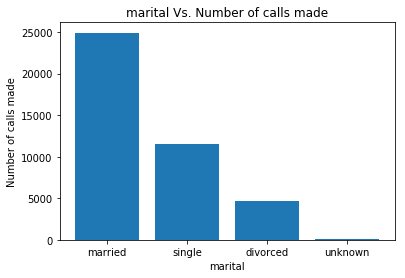

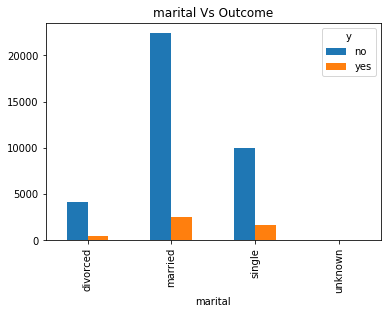

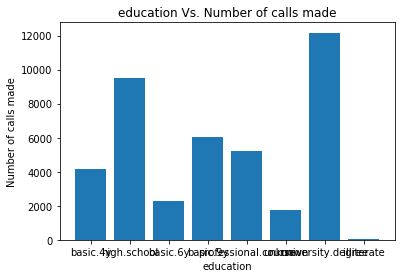

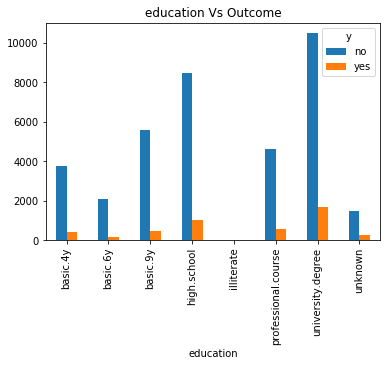

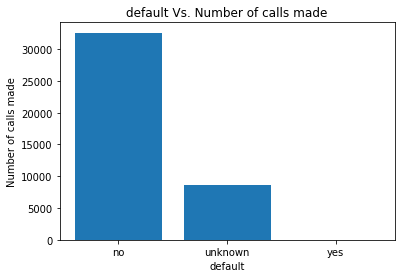

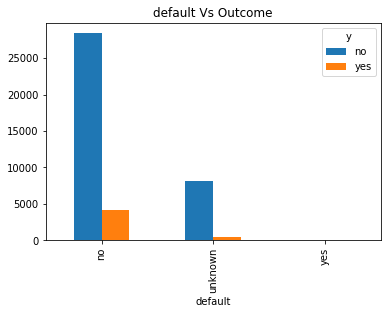

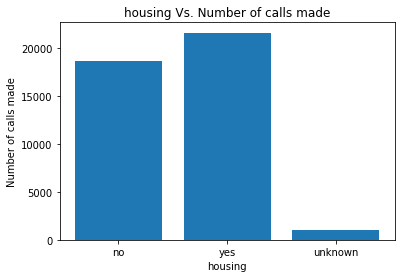

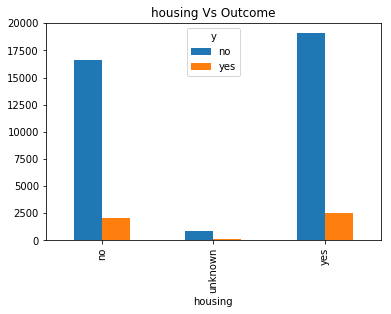

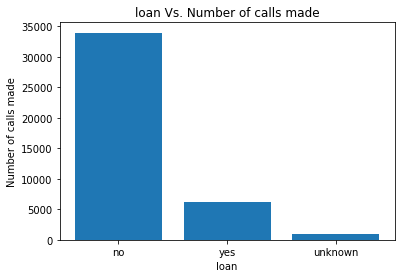

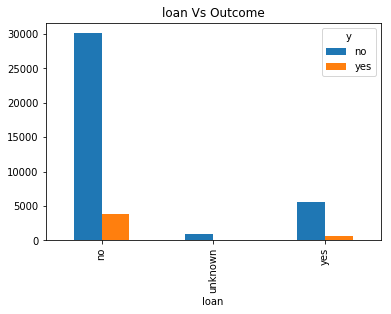

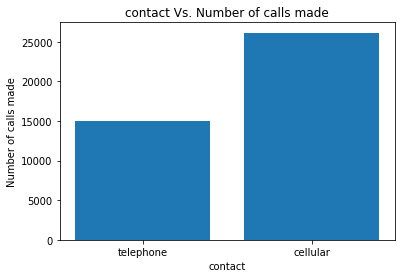

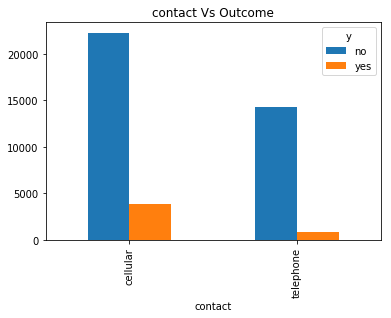

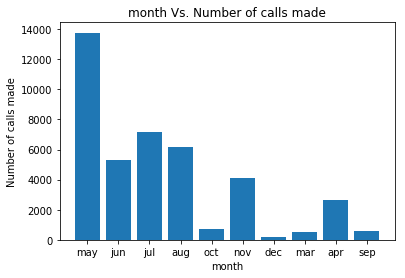

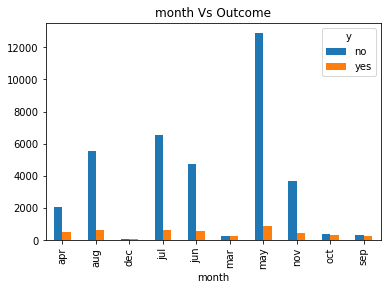

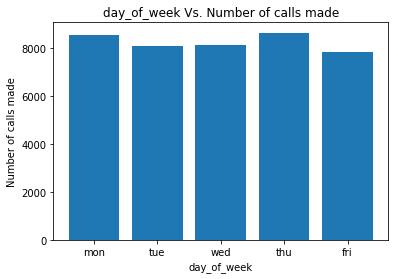

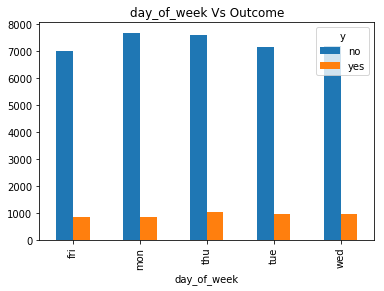

In [72]:
#Creating a general function that would generate the the graphs and crosstabs for a categorical data which will help us
#provide key insights for the dataset

def generate_report( df,colunm_name , target):
    day = df[colunm_name].unique()
    a = df[colunm_name].value_counts()
    n_calls = [ a[i] for i in day]

    plt.bar(day,n_calls,align='center')
    plt.xlabel(colunm_name)
    plt.ylabel("Number of calls made")
    plt.title( colunm_name +" Vs. Number of calls made")
    plt.show()

    pd.crosstab(df[colunm_name] , df[target]).plot(kind = "bar" , sort_columns = False  ,title = colunm_name + " Vs Outcome")
    plt.xticks(rotation = 90)
    plt.show()

    pd.crosstab(df[target] , df[target])
    

for i in categorical_data:
    generate_report(df,i,'y')

    

In [46]:
def ohe_label_encoding(df,column):
    #Using the label encoder to convert the string values into labels
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
        
    ohe = OneHotEncoder()
    temp_array = ohe.fit_transform(df[[column]]).toarray()    
    column_names= [ column + "_" + str(m) for m in le.classes_ ]   
    

    return( pd.DataFrame(data = temp_array , columns = column_names) ) 

#By this way we can transform a categorical data into machine readable format by using OneHotEncoder of the SkLearn package
#Note the newer versions of SkLearn can automatically convert the categorical data string or other values into OneHotEncodings

In [47]:
new_df = df[numerical_data]


temp_df = df.copy()

temp_df["y"].replace({"no": 0 , "yes" : 1} , inplace = True)


for i in categorical_data:
    new_df = pd.concat( [new_df, ohe_label_encoding(temp_df,i)],axis =1)

new_df['y'] = df['y']
    

C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case 

In [48]:
x = new_df[ list( set (new_df.columns) - set('y') ) ]
y = temp_df["y"]

In [58]:
x_train , x_test ,y_train , y_test = train_test_split(x,y,test_size = 0.3)
lor = LogisticRegression()

In [59]:
lor.fit(x_train,y_train)

C:\Users\Shivansh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [60]:
y_pred = lor.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [66]:
precision = precision_score(y_test,y_pred)
print( "Score : {:.3f}".format(lor.score(x_test,y_test)) )

Score : 0.889


In [55]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10928
           1       0.50      0.08      0.14      1429

   micro avg       0.88      0.88      0.88     12357
   macro avg       0.70      0.54      0.54     12357
weighted avg       0.85      0.88      0.85     12357



In [56]:
confusion_mat = confusion_matrix(y_test,y_pred)
confusion_mat

array([[10807,   121],
       [ 1308,   121]], dtype=int64)